In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#displays all columns in dataframe even if millions
pd.pandas.set_option('display.max_columns',None)


In [23]:
dataset=pd.read_csv("data/scheduler_data.csv")

print(dataset.shape)

(287173, 30)


In [24]:
dataset.head()

,id_array_job,id_array_task,id_user,kill_requid,nodes_alloc,nodelist,cpus_req,derived_ec,exit_code,gres_req,gres_alloc,array_max_tasks,array_task_pending,constraints,flags,mem_req,partition,priority,state,timelimit,time_submit,time_eligible,time_start,time_end,time_suspended,track_steps,tres_alloc,tres_req,job_type,id_job
0,41161693674,4595979483,66088413977,51671871839,0,[],1,0,256,NaN,NaN,0,0,xeon-g6,0,9.223370e+18,gpu,19995,5,720,3014,3014,3014,3014,-1,0,NaN,"1=1,2=5000,4=1,5=1,1002=2",OTHER,13715936505
1,41161693674,4595979483,66088413977,51671871839,1,['r2684277-n303509'],1,0,0,gpu:volta:2,gpu:2,0,0,xeon-g6,2,9.223370e+18,gaia,19995,3,4294967295,3022,3022,3022,3025,-1,0,"1=1,2=9600,4=1,5=1,1002=2","1=1,2=9600,4=1,5=1,1002=2",OTHER,25780056187
2,41161693674,4595979483,16176946191,51671871839,1,['r5198790-n347934'],4,32512,32512,gpu:volta:1,gpu:1,0,0,xeon-g6,4,9.223370e+18,gaia,110012,5,4294967295,5682,5682,5683,5684,-1,0,"1=4,2=38400,4=1,5=4,1002=1","1=4,2=38400,4=1,5=4,1002=1",OTHER,53722449986
3,41161693674,4595979483,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,gpu:1,0,0,xeon-e5,4,9.223370e+18,gpu,110023,4,720,34467,34467,34468,34548,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,19989272070
4,41161693674,4595979483,16176946191,16176946191,1,['r3541344-n655125'],4,0,0,gpu:volta:1,gpu:1,0,0,xeon-e5,4,9.223370e+18,gpu,110006,4,720,34596,34596,34596,35108,-1,0,"1=4,2=20000,4=1,5=4,1002=1","1=4,2=20000,4=1,5=4,1002=1",OTHER,49220239266


### In Data Analysis We will Analyze To Find out the below stuff
- Missing Values
- All The Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature(SalePrice)

In [25]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

gres_req 0.2455  % missing values
gres_alloc 0.2455  % missing values
tres_alloc 0.2456  % missing values


In [26]:
dataset["gres_req"].isna().sum() - len(dataset["gres_req"])

-216676

### Since they are many missing values, we need to find the relationship between missing values
Let's plot some diagram for this relationship

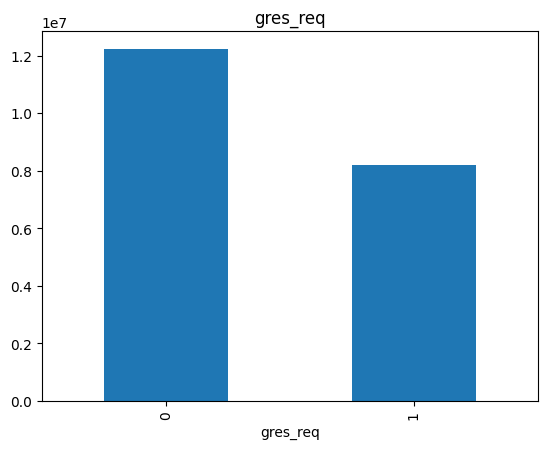

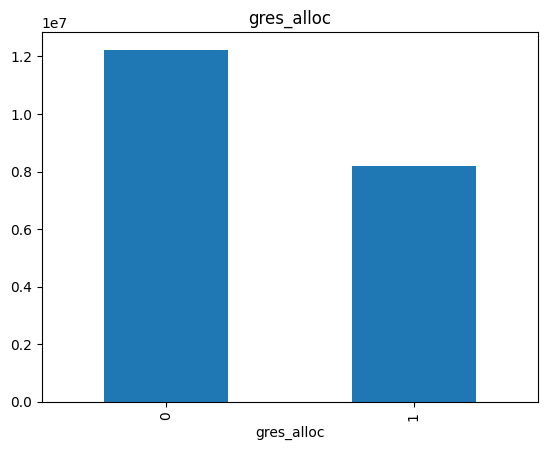

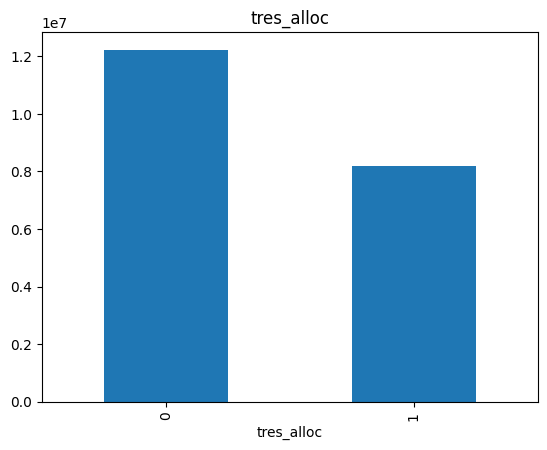

In [27]:
for feature in features_with_na:
    data = dataset.copy()
    

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean END where the information is missing or present
    data.groupby(feature)['time_end'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Here where Nan we converted it to 1 and values present to 0 
Here with relation etween missing values and dependent variable is clar so we need to replace NAN valus in FE part

### Numerical Variables

In [28]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  22


,id_array_job,id_array_task,id_user,kill_requid,nodes_alloc,cpus_req,derived_ec,exit_code,array_max_tasks,array_task_pending,flags,mem_req,priority,state,timelimit,time_submit,time_eligible,time_start,time_end,time_suspended,track_steps,id_job
0,41161693674,4595979483,66088413977,51671871839,0,1,0,256,0,0,0,9.223370e+18,19995,5,720,3014,3014,3014,3014,-1,0,13715936505
1,41161693674,4595979483,66088413977,51671871839,1,1,0,0,0,0,2,9.223370e+18,19995,3,4294967295,3022,3022,3022,3025,-1,0,25780056187
2,41161693674,4595979483,16176946191,51671871839,1,4,32512,32512,0,0,4,9.223370e+18,110012,5,4294967295,5682,5682,5683,5684,-1,0,53722449986
3,41161693674,4595979483,16176946191,16176946191,1,4,0,0,0,0,4,9.223370e+18,110023,4,720,34467,34467,34468,34548,-1,0,19989272070
4,41161693674,4595979483,16176946191,16176946191,1,4,0,0,0,0,4,9.223370e+18,110006,4,720,34596,34596,34596,35108,-1,0,49220239266


In [30]:
numerical_features

['id_array_job',
 'id_array_task',
 'id_user',
 'kill_requid',
 'nodes_alloc',
 'cpus_req',
 'derived_ec',
 'exit_code',
 'array_max_tasks',
 'array_task_pending',
 'flags',
 'mem_req',
 'priority',
 'state',
 'timelimit',
 'time_submit',
 'time_eligible',
 'time_start',
 'time_end',
 'time_suspended',
 'track_steps',
 'id_job']

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables (Countables) 


discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

In [ ]:
discrete_feature

In [ ]:
dataset[discrete_feature].head()

In [ ]:
# ## Lets Find the realtionship between them and End time

# for feature in discrete_feature:
#     data=dataset.copy()
#     data.groupby(feature)['time_end'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('time_end')
#     plt.title(feature)
#     plt.show()

In [ ]:
for feature in discrete_feature:
    data = dataset.copy()
    
    # Drop rows with NaN in the feature or 'time_end'
    data = data.dropna(subset=[feature, 'time_end'])
    
    # Group by feature and calculate median
    grouped_data = data.groupby(feature)['time_end'].median()
    print(f'Grouped data for {feature}:\n', grouped_data)
    
    # Check if grouped_data is not empty
    if not grouped_data.empty:
        grouped_data.plot.bar()
        plt.xlabel(feature)
        plt.ylabel('time_end')
        plt.title(feature)
        plt.show()
    else:
        print(f"No data to plot for {feature}.")


In [ ]:

## There is a relationship between variable number and end time

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

In [ ]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## DATA is not following Gaussian Distribution

Coverting it into Gausian using Logrithmeic Transformation

In [ ]:
#EDA-2

## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique(): #
        pass
    else:
        data[feature]=np.log(data[feature])
        data['time_end']=np.log(data['time_end'])
        plt.scatter(data[feature],data['time_end'])
        plt.xlabel(feature)
        plt.ylabel('time_end')
        plt.title(feature)
        plt.show()
        

In [ ]:
## outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

### THERE ARE LOT OF OUTLIERS


In [29]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['nodelist',
 'gres_req',
 'gres_alloc',
 'constraints',
 'partition',
 'tres_req',
 'job_type']

In [ ]:
dataset[categorical_features].head()

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

In [ ]:
## Find out the relationship between categorical variable and dependent feature end time

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['time_end'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('time_end')
    plt.title(feature)
    plt.show()

In [ ]:
## FE-1

## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['time_end'],test_size=0.1,random_state=0)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
##MISSING  value

## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

In [ ]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

In [ ]:
dataset.head()

In [ ]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

## As Numerical features had lot of outliers we are filling NAN values with Median Values

In [ ]:
import numpy as np

for feature in numerical_with_nan:
    # Check if the feature is empty
    if dataset[feature].isnull().all():
        print(f"Warning: {feature} is completely NaN. Filling with a specific value (e.g., 0).")
        dataset[feature].fillna(0, inplace=True)  # or choose a value that makes sense for your dataset
    else:
        # Calculate median and create new feature for nan values
        median_value = dataset[feature].median()
        
        # Create a new feature to capture nan values
        dataset[feature + 'nan'] = np.where(dataset[feature].isnull(), 1, 0)
        
        # Replace NaN with the median
        dataset[feature].fillna(median_value, inplace=True)

# Check if any NaNs remain in the numerical columns
print(dataset[numerical_with_nan].isnull().sum())


In [ ]:
dataset.head(5)

In [ ]:
dataset.info()

In [ ]:
# import numpy as np

# for feature in num_features:
#     print(f"{feature} has {np.sum(dataset[feature] <= 0)} non-positive values")




In [ ]:
# for feature in num_features:
#     dataset[feature] = dataset[feature].replace(0, 1e-10)  # Replace zeros
#     dataset[feature] = np.log(dataset[feature])



In [ ]:
import numpy as np
num_features=['id_user','kill_requid','cpus_req','timelimit','time_submit','time_eligible','time_start','id_job']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [ ]:
dataset.head()

## Log normal DISTRIBUTION for skewed data

In [ ]:
dataset.head()

In [ ]:
# Handling Rare Categorical Feature
# We will remove categorical variables that are present less than 1% of the observations


categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']


In [ ]:

categorical_features

In [ ]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['time_end'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [ ]:
dataset.head(100)

In [ ]:
dataset['nodelist'].iloc[0]

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['time_end'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:

dataset.head(10)

# Here We are Testing Both Standard Scaler and MinMax Scaler who ever gives best accuracy we will use it

In [ ]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['time_end'] ]
len(scaling_feature)



In [ ]:
scaling_feature

In [ ]:
dataset.head()

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['time_end']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

In [ ]:

scaler.transform(dataset[feature_scale])

dataset.head()

In [ ]:
dataset.head()

In [ ]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[[ 'time_end']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [ ]:
data.to_csv('X_train.csv',index=False)

In [ ]:
##FINAL

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

dataset=pd.read_csv('X_train.csv')

In [ ]:
dataset.head()

In [ ]:
## Capture the dependent feature
y_train=dataset[['time_end']]

In [ ]:
## drop dependent feature from dataset
X_train=dataset.drop(['time_end'],axis=1)

In [ ]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

In [ ]:
feature_sel_model.get_support()
#True --> Get this feature False --> Not much IMP feature

In [ ]:
# Print the number of total and selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# Let's print some stats
print('Total features: {}'.format(X_train.shape[1]))
print('Selected features: {}'.format(len(selected_feat)))

# Assuming the feature selection model is in feature_sel_model
# Checking for coefficients shrunk to zero (if using a model like Lasso)
print('Features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


In [ ]:
selected_feat

In [ ]:
X_train=X_train[selected_feat]

In [ ]:

X_train.head()

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
X_train

In [ ]:
X = X_train.drop(columns=['time_end.1'])

In [ ]:
X.head()

In [ ]:
y = dataset['time_end.1']

In [ ]:
y

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
     "Ridge": Ridge(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
     "Decision Tree": DecisionTreeRegressor(),
     "Random Forest Regressor": RandomForestRegressor(),
     "XGBRegressor": XGBRegressor(), 
     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
     "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df